In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('thads2013n.csv', quotechar="'")
# quotechar = "'" it is for ignore needless quotation mark

In [3]:
df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,100003130103,82,3,1,73738,956,15738,26213,40322,11067,...,1 LTE 50% FMR,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,.,2 30% to 50%,-5,-5
1,100006110249,50,5,3,55846,1100,17165,28604,45744,24218,...,3 GT FMR,4 60 - 80% AMI,4 60 - 80% AMI,6 100 - 120% AMI,4 60 - 80% AMI,7 120% AMI +,.,1 Less than 30%,-5,-5
2,100006370140,53,5,3,55846,1100,13750,22897,36614,15470,...,2 50.1 - 100% FMR,4 60 - 80% AMI,5 80 - 100% AMI,6 100 - 120% AMI,4 60 - 80% AMI,4 60 - 80% AMI,.,3 50% or More,-5,-5
3,100006520140,67,5,3,55846,949,13750,22897,36614,13964,...,2 50.1 - 100% FMR,6 100 - 120% AMI,7 120% AMI +,7 120% AMI +,5 80 - 100% AMI,4 60 - 80% AMI,.,1 Less than 30%,-5,-5
4,100007130148,26,1,3,60991,737,14801,24628,39421,15492,...,3 GT FMR,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,7 120% AMI +,0 Not Assisted,1 Less than 30%,-5,-5


In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 99 columns):
control                64535 non-null int64
age1                   64535 non-null int64
metro3                 64535 non-null int64
region                 64535 non-null int64
lmed                   64535 non-null int64
fmr                    64535 non-null int64
l30                    64535 non-null int64
l50                    64535 non-null int64
l80                    64535 non-null int64
ipov                   64535 non-null int64
bedrms                 64535 non-null int64
built                  64535 non-null int64
status                 64535 non-null int64
type                   64535 non-null int64
value                  64535 non-null int64
vacancy                64535 non-null int64
tenure                 64535 non-null int64
nunits                 64535 non-null int64
rooms                  64535 non-null int64
weight                 64535 non-null float64
per      

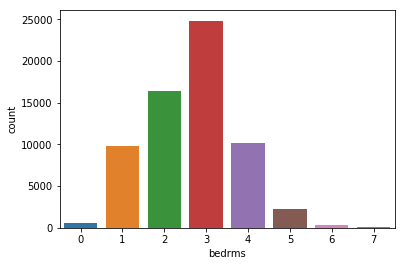

In [6]:
sb.countplot(data = df, x = 'bedrms');

In [7]:
base_color = sb.color_palette()[0]

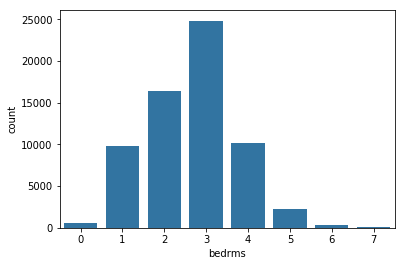

In [8]:
sb.countplot(data = df, x = 'bedrms',color = base_color);

In [9]:
room_order = df['bedrms'].value_counts().index

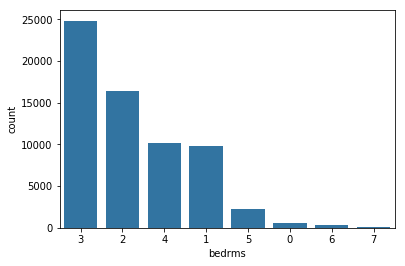

In [10]:
sb.countplot(data = df, x = 'bedrms',color = base_color, order = room_order);

In [11]:
n_points = df.shape[0]
max_count = df['bedrms'].value_counts().max()
max_prop = max_count / n_points
tick_props = np.arange(0,max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

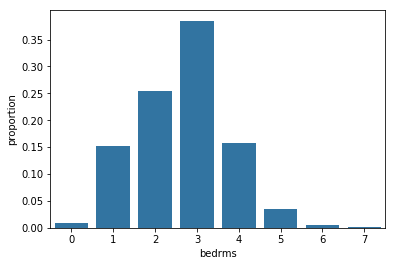

In [12]:
sb.countplot(data = df, x = 'bedrms', color = base_color);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion');

In [13]:
bedrms_count = df['bedrms'].value_counts()

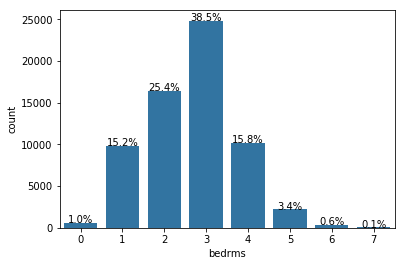

In [14]:
sb.countplot(data = df, x = 'bedrms', color = base_color);
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = bedrms_count[int(label.get_text())]
    
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count, pct_string, ha = 'center')

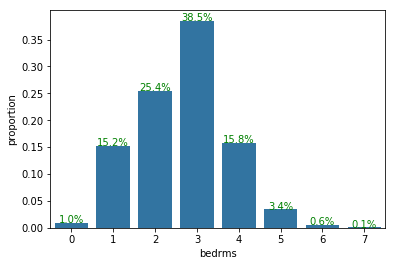

In [15]:
sb.countplot(data = df, x = 'bedrms', color = base_color);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion');
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = bedrms_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count, pct_string, ha = 'center', color = 'g')

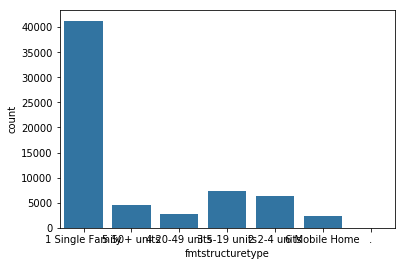

In [16]:
sb.countplot(data = df, x = 'fmtstructuretype', color = base_color);

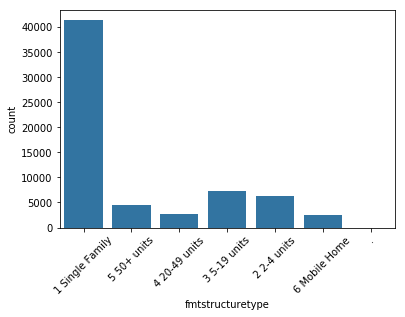

In [17]:
sb.countplot(data = df, x = 'fmtstructuretype', color = base_color);
plt.xticks(rotation = 45);

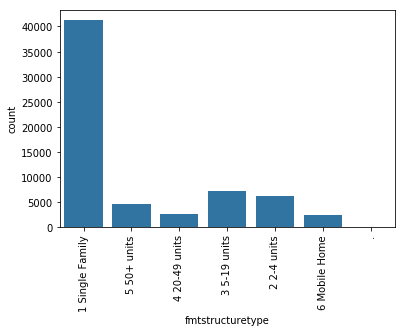

In [18]:
sb.countplot(data = df, x = 'fmtstructuretype', color = base_color);
plt.xticks(rotation = 90);

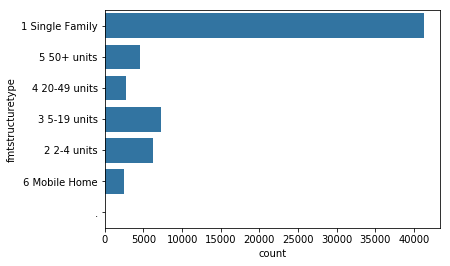

In [19]:
sb.countplot(data = df, y = 'fmtstructuretype', color = base_color);

In [20]:
fmtstructuretype_order = df.fmtstructuretype.value_counts().index

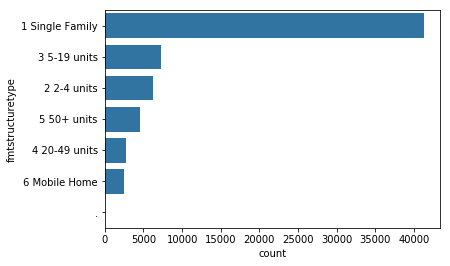

In [21]:
sb.countplot(data = df, y = 'fmtstructuretype', color = base_color, order = fmtstructuretype_order);

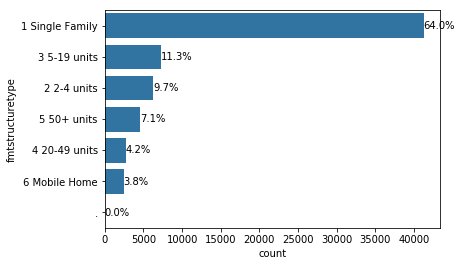

In [22]:
sb.countplot(data = df, y = 'fmtstructuretype', color = base_color, order = fmtstructuretype_order);
for i in range(df.fmtstructuretype.value_counts().shape[0]):
    count = df.fmtstructuretype.value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(count+1, i, pct_string, va = 'center');

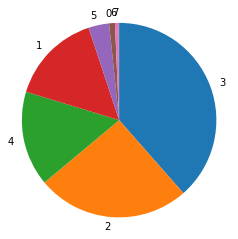

In [23]:
plt.pie(bedrms_count, labels = bedrms_count.index, startangle=90, counterclock=False);
plt.axis('square');

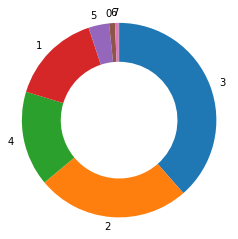

In [24]:
plt.pie(bedrms_count, labels = bedrms_count.index, startangle=90, counterclock=False, wedgeprops={'width':0.4});
plt.axis('square');